In [17]:
#Importar as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC

In [18]:
# Carregar o dataset
data = pd.read_csv('earthquake_alert_balanced_dataset.csv')
df = pd.DataFrame(data)
# Exibir as primeiras linhas do dataset
print(df.head())
print(df.info())

   magnitude  depth  cdi  mmi   sig  alert
0        7.0   14.0  8.0  7.0   0.0  green
1        6.9   25.0  4.0  4.0 -33.0  green
2        7.0  579.0  3.0  3.0 -13.0  green
3        7.3   37.0  5.0  5.0  65.0  green
4        6.6  624.0  0.0  2.0 -98.0  green
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  1300 non-null   float64
 1   depth      1300 non-null   float64
 2   cdi        1300 non-null   float64
 3   mmi        1300 non-null   float64
 4   sig        1300 non-null   float64
 5   alert      1300 non-null   object 
dtypes: float64(5), object(1)
memory usage: 61.1+ KB
None


In [20]:
#Transformar a coluna 'alert' em valores numéricos
label_encoder = LabelEncoder()
df['alert'] = label_encoder.fit_transform(df['alert'])

In [21]:
# Selecionar características e rótulo
X = df.drop('alert', axis=1)
y = df['alert']

# Dividir o dataset em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [22]:
# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train)

[[-0.63024867 -0.0946184  -1.77310609 -0.67934126 -0.6989535 ]
 [-1.34782553 -0.38970793  0.01158332 -1.41376425 -1.05500506]
 [ 1.76167418 -0.40815103  0.45775567  1.5239277   0.20735958]
 ...
 [-0.3192987  -0.23294162  0.90392803  0.05508172  1.19459346]
 [ 0.92450118 -0.306714    0.45775567  0.78950471 -0.2296128 ]
 [ 0.82882427 -0.25138471  0.45775567  0.05508172  0.14262293]]


In [23]:
# Treinar o modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))
print("KNN Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.77      0.83        65
           1       0.81      0.85      0.83        65
           2       0.86      0.95      0.91        65
           3       0.78      0.78      0.78        65

    accuracy                           0.84       260
   macro avg       0.84      0.84      0.84       260
weighted avg       0.84      0.84      0.84       260

KNN Confusion Matrix:
[[50  3  2 10]
 [ 2 55  5  3]
 [ 0  2 62  1]
 [ 3  8  3 51]]


In [27]:
# Treinar o modelo SVM
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("SVM Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.80      0.85        65
           1       0.62      0.37      0.46        65
           2       0.68      0.80      0.74        65
           3       0.52      0.71      0.60        65

    accuracy                           0.67       260
   macro avg       0.68      0.67      0.66       260
weighted avg       0.68      0.67      0.66       260

SVM Confusion Matrix:
[[52  1  1 11]
 [ 0 24 16 25]
 [ 0  7 52  6]
 [ 5  7  7 46]]


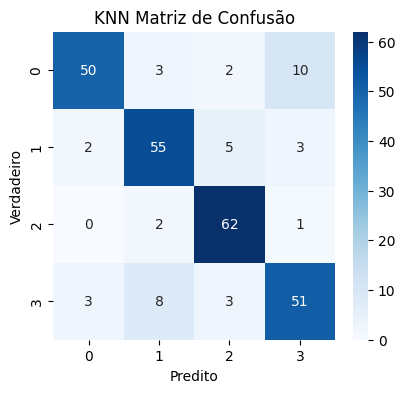

In [28]:
# Visualizar a matriz de confusão para KNN
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Blues')
plt.title('KNN Matriz de Confusão')
plt.xlabel('Predito')
plt.ylabel('Verdadeiro') 
plt.show() 

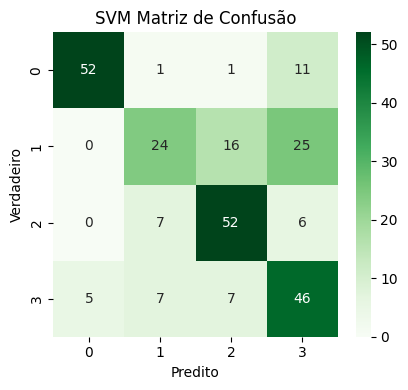

In [29]:
# Visualizar a matriz de confusão para SVM
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Greens')
plt.title('SVM Matriz de Confusão')
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.tight_layout()
plt.show()